In [1]:
## Create ouryelpusers.csv dataset 
##   from user.json 
##   reduced by only those users who are in the ouryelpreviews.csv

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import types
import re
#import ijson

import os
from datetime import datetime

%matplotlib inline
##

datetime.now().strftime('%Y-%m-%d %H:%M:%S')

'2019-06-01 10:24:15'

In [2]:
#setup environment
import os
cwd = os.getcwd()
print("Current Working Directory " , cwd)
os.chdir("C:/Users/Richpat/Documents/@syracuse coursework/@IST 718 Big Data Analytics (Python)/finalproject")
print('\nFiles in directory', os.listdir())
print('\n')
pd.show_versions(as_json=True) # True to shorten/flatten output
print ('\nStart date/time', datetime.now().strftime('%Y-%m-%d %H:%M:%S'))

Current Working Directory  c:\Users\Richpat\Documents\@syracuse coursework\@IST 718 Big Data Analytics (Python)\finalproject

Files in directory ['.ipynb_checkpoints', '16zpallnoagi.csv', '16zpdoc.doc', '2016_Historical_Business_File_Layout.xlsx', 'aclImdb_v1', 'aclImdb_v1.tar', 'aclImdb_v1.tar.gz', 'b.2.1_41473_project_checkpoint_1_clean.pdf', 'b.4.1_41474_project_checkpoint_2_clean.pdf', 'bCatTall.csv', 'business.json', 'BusinessCategoryCount.csv', 'checkin.json', 'Dataset_Challenge_Dataset_Agreement.pdf', 'DBHArizona164RestaurantsHighRisk.csv', 'DBHArizona164RestaurantsLowGT9.csv', 'DBHArizona164RestaurantsLowLT10.csv', 'DBHArizona164RestaurantsMediumGT6.csv', 'DBHArizona164RestaurantsMediumLT7.csv', 'DBHArizona164RestaurantsNARisk.csv', 'DBHNevada164RestaurantsHighRisk.csv', 'DBHNevada164RestaurantsLowRisk.csv', 'DBHNevada164RestaurantsMediumRisk.csv', 'DBHNevada164RestaurantsNARisk.csv', 'DBHRestaurants.csv', 'DBHRestaurantsSource.zip', 'DescribeYelpData.ipynb', 'DRT_IST718_FinalP

In [3]:
def readJSONreturnLIST (fn, verbosity):

    print ('Start readJSONreturnLIST for ', fn, 'at date/time', datetime.now().strftime('%Y-%m-%d %H:%M:%S'))
    
    with open(fn, encoding='utf-8') as json_file:      
        data = json_file.readlines()
        # this line below may take at least 8-10 minutes of processing for 4-5 million rows. It converts all strings in list to actual json objects. 
        data = list(map(json.loads, data)) 
        
    print ('Type data', type(data), 'len data', len(data))
        
    print ('Start readJSONreturnLIST date/time', datetime.now().strftime('%Y-%m-%d %H:%M:%S'))

    return (data)

In [4]:
def descriptiveStatsNum(vals, key, title, verbose):
    x_plot=vals
    
    print ("Data Sample for ", title)
    print(pd.DataFrame.head(x_plot))
    
    ax = sns.distplot(x_plot)
    ax.axvline(x_plot.median(), lw=2.5, ls='dashed', color='black')
    ax.axvline(x_plot.mean(), lw=2.5, ls='dashed', color='red')
    plt.title(title + ' Distribution with Median (black) and Mean (red)')
    plt.show()

    print (title +' Descriptive Stats for ' + key)
    print (x_plot.describe())

    ax = sns.boxplot(x_plot, orient='v')
    plt.title(title + ' Boxplot')
    plt.show()
    
    return

In [5]:
#plot barchart from row/column input

def mybarchart(mbcmx, mbcx, mbcy, mbchowmany, mbctitle):
    # mbcmx innound rowxcol mx (row = groups to display, cols = values)
    # mbcx colname of x
    # mbcy colname of y
    # mbchowmany number of bars to display
    # mbctitle what is the title of the chart
    
    PltMX=mbcmx
    PltToShow=mbchowmany
    PltTitle=mbctitle + ': Top ' + str(PltToShow)

    print (PltTitle, ' ', PltMX.shape)
    #print ('Date/time:', datetime.now().strftime('%Y-%m-%d %H:%M:%S'))

    #set PltMX (plot matrix) as input values; assumes input is in correct order
    PltMX=PltMX.head(PltToShow)

    #PltMX.columns = ['Count']
    PltMX[mbcx]=PltMX.index #use index as plot label
    PltMX['Label']=PltMX[mbcx]

    #prep labels
    bars=PltMX['Label']
    y_pos = np.arange(len(bars))
    height = PltMX[mbcy] #show 3 decimals if we are choosing the top 20

    #bars
    plt.bar(y_pos, height)

    #xlabels, ylabels, title
    plt.xticks(y_pos, bars, color='blue', rotation=90)
    plt.yticks(color='blue')
    plt.title(PltTitle)

    # Text on the top of each barplot
    for i in range(len(height)):
        plt.text(x = (i)-0.5 , y = height[i]+0.1, s = str(height[i]) , size = 7)
    
    #width of display 
    fig = plt.gcf()
    fig.set_size_inches( 12, 7)

    # Show graphic
    plt.show()

    return()

In [6]:
# read in full user.json dataset from yelp

print ('Start date/time:', datetime.now().strftime('%Y-%m-%d %H:%M:%S'))
users=readJSONreturnLIST ('user.json', 2)
print ('End date/time:', datetime.now().strftime('%Y-%m-%d %H:%M:%S'))


Start date/time: 2019-06-01 10:24:18
Start readJSONreturnLIST for  user.json at date/time 2019-06-01 10:24:18
Type data <class 'list'> len data 1637138
Start readJSONreturnLIST date/time 2019-06-01 10:25:28
End date/time: 2019-06-01 10:25:28


In [7]:
print ('Date/time:', datetime.now().strftime('%Y-%m-%d %H:%M:%S'))
rNoUsersCnt=0
print ('Sample of user data')
print ('===================')
for user in users:
    if rNoUsersCnt==0:
        print (user)
        print ('User', user['user_id'])
        print ('Name', user['name'])
        print ('Review Count', user['review_count'])
        print (json.dumps(user, indent=4))
    rNoUsersCnt+=1
print('Number of users counted:', rNoUsersCnt)
print ('Date/time:', datetime.now().strftime('%Y-%m-%d %H:%M:%S'))

Date/time: 2019-06-01 10:25:28
Sample of user data
{'user_id': 'l6BmjZMeQD3rDxWUbiAiow', 'name': 'Rashmi', 'review_count': 95, 'yelping_since': '2013-10-08 23:11:33', 'useful': 84, 'funny': 17, 'cool': 25, 'elite': '2015,2016,2017', 'friends': 'c78V-rj8NQcQjOI8KP3UEA, alRMgPcngYSCJ5naFRBz5g, ajcnq75Z5xxkvUSmmJ1bCg, BSMAmp2-wMzCkhTfq9ToNg, jka10dk9ygX76hJG0gfPZQ, dut0e4xvme7QSlesOycHQA, l4l5lBnK356zBua7B-UJ6Q, 0HicMOOs-M_gl2eO-zES4Q, _uI57wL2fLyftrcSFpfSGQ, T4_Qd0YWbC3co6WSMw4vxg, iBRoLWPtWmsI1kdbE9ORSA, xjrUcid6Ymq0DoTJELkYyw, GqadWVzJ6At-vgLzK_SKgA, DvB13VJBmSnbFXBVBsKmDA, vRP9nQkYTeNioDjtxZlVhg, gT0A1iN3eeQ8EMAjJhwQtw, 6yCWjFPtp_AD4x93WAwmnw, 1dKzpNnib-JlViKv8_Gt5g, 3Bv4_JxHXq-gVLOxYMQX0Q, ikQyfu1iViYh8T0us7wiFQ, f1GGltNaB7K5DR1jf3dOmg, tgeFUChlh7v8bZFVl2-hjQ, -9-9oyXlqsMG2he5xIWdLQ, Adj9fBPVJad8vSs-mIP7gw, Ce49RY8CKXVsTifxRYFTsw, M1_7TLi8CbdA89nFLlH4iw, wFsNv-hqbW_F5-IRqfBN6g, 0Q1L7zXHocaUZ2gsG2XJeg, cBFgmOCBdhYa0xoFEAzp_g, VrD_AgiFvzqtlR15vir3SQ, cpE-7HK514Sr5vpSen9CEQ, F1UYelhPFB-

In [8]:
#convert USERS to DF
print ('Date/time:', datetime.now().strftime('%Y-%m-%d %H:%M:%S'))
usersDF=pd.DataFrame(users)
usersDF.index=usersDF['user_id']
usersDF.drop('user_id', axis=1, inplace=True)  

print("usersDF data")
print("============")

#print("\n***** isna")
#print(usersDF.isnull().sum())

print("\n***** dtypes")
print(usersDF.dtypes)

print("\n***** head")
print(pd.DataFrame.head(usersDF))

print("\n***** describe")
print(usersDF.describe())

print ('Date/time:', datetime.now().strftime('%Y-%m-%d %H:%M:%S'))

Date/time: 2019-06-01 10:25:31
usersDF data

***** dtypes
average_stars         float64
compliment_cool         int64
compliment_cute         int64
compliment_funny        int64
compliment_hot          int64
compliment_list         int64
compliment_more         int64
compliment_note         int64
compliment_photos       int64
compliment_plain        int64
compliment_profile      int64
compliment_writer       int64
cool                    int64
elite                  object
fans                    int64
friends                object
funny                   int64
name                   object
review_count            int64
useful                  int64
yelping_since          object
dtype: object

***** head
                        average_stars  compliment_cool  compliment_cute  \
user_id                                                                   
l6BmjZMeQD3rDxWUbiAiow           4.03                1                0   
4XChL029mKr5hydo79Ljxg           3.63                1       

In [9]:
OurReviewsDF = pd.read_csv("ouryelpreviews.csv", sep="|")

print("OurReviewsDF data")
print("================")

#print("\n***** isna")
#print(OurReviewsDF.isnull().sum())

print("\n***** dtypes")
print(OurReviewsDF.dtypes)

print("\n***** head")
print(pd.DataFrame.head(OurReviewsDF))

print("\n***** describe")
print(OurReviewsDF.describe())

OurReviewsDF data

***** dtypes
Unnamed: 0       int64
review_id       object
user_id         object
business_id     object
stars          float64
text            object
date            object
dtype: object

***** head
   Unnamed: 0               review_id                 user_id  \
0           0  GJXCdrto3ASJOqKeVWPi6Q  yXQM5uF2jS6es16SJzNHfg   
1           0  RS_GTIT6836bCaPy637kNQ  nMeCE5-xsdleyxYuNZ_7rA   
2           0  -I5umRTkhw15RqpKMl_o1Q  -mA3-1mN4JIEkqOtdbNXCQ   
3           0  qm97yMwREr7BKkexlwLFbg  TTRVdTXKcq-xn6-1IWbwEw   
4           0  bjD0Dqn3k-fi00BXatrytg  1fi6x4tnJtlVWaJmoIO9XA   

              business_id  stars  \
0  NZnhc2sEQy3RmzKTZnqtwQ    5.0   
1  oxwGyA17NL6c5t1Etg5WgQ    3.0   
2  mRUVMJkUGxrByzMQ2MuOpA    1.0   
3  Gyrez6K8f1AyR7dzW9fvAw    5.0   
4  XTzKRvWciP_BZ9imk8mmPQ    1.0   

                                                text                 date  
0  I *adore* Travis at the Hard Rock's new Kelly ...  2017-01-14 21:30:33  
1  It's a giant Best 

In [10]:
#summarise the reviewDF to unique userIDs only

ReviewUserIDDF = OurReviewsDF.groupby(['user_id'])['user_id'].agg(['count'])
ReviewUserIDDF.columns = ['CatCnt']

print("ReviewUserIDDF data : length:", len(ReviewUserIDDF))
print("==================================")

print("\n***** describe")
print(ReviewUserIDDF.describe())

print("\n***** head")
print(pd.DataFrame.head(ReviewUserIDDF))


ReviewUserIDDF data : length: 455680

***** describe
              CatCnt
count  455680.000000
mean        2.288551
std         5.227483
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max       624.000000

***** head
                        CatCnt
user_id                       
---1lKK3aKOuomHnwAkAow      29
---PLwSf5gKdIoVnyRHgBA       1
---udAKDsn0yQXmzbWQNSw       1
--0LlX_UcypHnxW-4BUAdA       1
--0WZ5gklOfbUIodJuKfaQ       1


In [11]:
#Reduce the User DF to have only those users that are in the OurReviewsDF

print ('\nDate/time:', datetime.now().strftime('%Y-%m-%d %H:%M:%S'))
OurUsersDF=usersDF.join(ReviewUserIDDF,how='right')
print ("\nNumber of users on the OurReviewsDF", len(ReviewUserIDDF))
print ("\nNumber of users on the OurUsersDF", len(OurUsersDF))
print ('\nDate/time:', datetime.now().strftime('%Y-%m-%d %H:%M:%S'))
       


Date/time: 2019-06-01 10:28:15

Number of users on the OurReviewsDF 455680

Number of users on the OurUsersDF 455680

Date/time: 2019-06-01 10:29:02


Data Sample for  Count of Reviews by User
user_id
---1lKK3aKOuomHnwAkAow    255
---PLwSf5gKdIoVnyRHgBA      2
---udAKDsn0yQXmzbWQNSw     54
--0LlX_UcypHnxW-4BUAdA      4
--0WZ5gklOfbUIodJuKfaQ      8
Name: review_count, dtype: int64


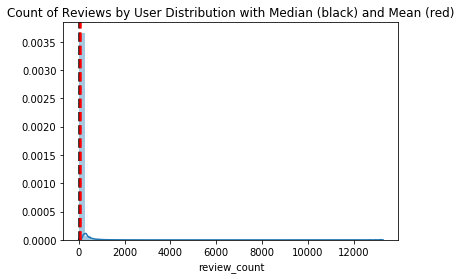

Count of Reviews by User Descriptive Stats for review_count
count    455680.000000
mean         37.973025
std         120.019628
min           0.000000
25%           3.000000
50%           9.000000
75%          25.000000
max       13278.000000
Name: review_count, dtype: float64


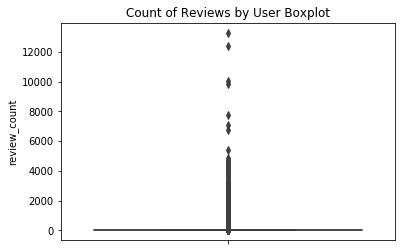

In [12]:
#run descriptive stats on non-transformed data
descriptiveStatsNum(OurUsersDF['review_count'], 'review_count', 'Count of Reviews by User', 2)



Number of reviews by User: Top 50   (455680, 1)


C:\Users\Richpat\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Richpat\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


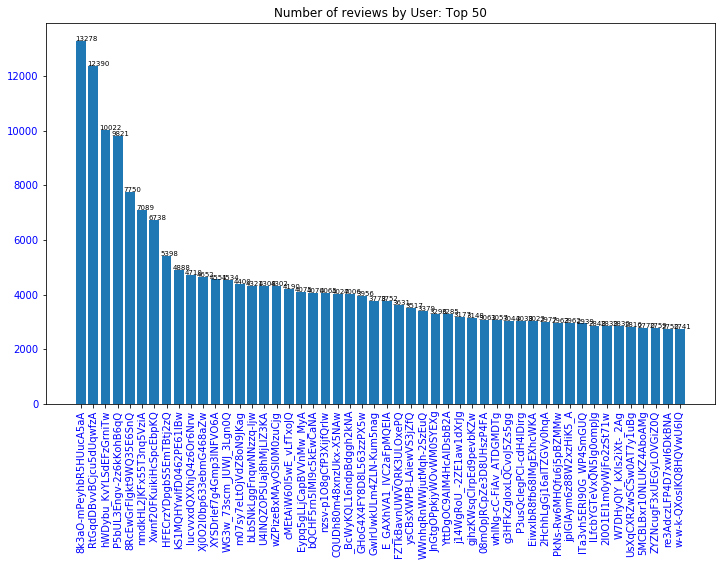

()

In [13]:
ztmp=pd.DataFrame(OurUsersDF['review_count'])
ztmp.index=OurUsersDF.index.astype(str)
ztmp=ztmp.sort_values('review_count', ascending=False)
#print(pd.DataFrame.head(ztmp))

mybarchart(ztmp, 'user_id', 'review_count', 50, 'Number of reviews by User')


In [14]:
print ('\nDate/time:', datetime.now().strftime('%Y-%m-%d %H:%M:%S'))
OurUsersDF.to_csv("ouryelpusers.csv", sep="|", encoding = 'utf-8')
print ('\nDate/time:', datetime.now().strftime('%Y-%m-%d %H:%M:%S'))


Date/time: 2019-06-01 10:29:06

Date/time: 2019-06-01 10:30:02
